In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 500)

# Chargement des données

customers = pd.read_csv("olist_customers_dataset.csv", low_memory=False)
geolocation = pd.read_csv("olist_geolocation_dataset.csv", low_memory=False)
order_items = pd.read_csv("olist_order_items_dataset.csv", low_memory=False)
order_payments = pd.read_csv(
    "olist_order_payments_dataset.csv", low_memory=False)
order_reviews = pd.read_csv(
    "olist_order_reviews_dataset.csv", low_memory=False)
orders = pd.read_csv("olist_orders_dataset.csv", low_memory=False)
products = pd.read_csv("olist_products_dataset.csv", low_memory=False)
sellers = pd.read_csv("olist_sellers_dataset.csv", low_memory=False)
product_category_name = pd.read_csv(
    "product_category_name_translation.csv", low_memory=False)

# Partie 1 : Description des datasets 

In [2]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [3]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [4]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [5]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [6]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


In [7]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [8]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [9]:
product_category_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


# Partie 2 : Fusion des données

In [10]:
data_product = pd.merge(products, product_category_name,
                        how="left", on="product_category_name")

In [11]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


In [12]:
# Je ne garde que les variables importantes. J'ai décidé de garder les descriptions et le nombre de photo car je pense
# que cela peut avoir une influence sur le choix des commandes des clients

list_product_useless = ['product_weight_g', 'product_length_cm', 'product_name_lenght'
                        'product_height_cm', 'product_width_cm', 'product_category_name']

data_product.drop(list_product_useless, axis=1, inplace=True)

In [13]:
data_order = pd.merge(order_items, orders, how="left", on="order_id")

In [14]:
data_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   customer_id                    112650 non-null  object 
 8   order_status                   112650 non-null  object 
 9   order_purchase_timestamp       112650 non-null  object 
 10  order_approved_at              112635 non-null  object 
 11  order_delivered_carrier_date   111456 non-null  object 
 12  order_delivered_customer_date 

In [15]:
# Je ne garde que les identifiants permettant de relier les différents datasets, le prix, le coût d'envoie, les dates
# de commande et les dates de livraisons

list_order_useless = ['seller_id', 'shipping_limit_date', 'order_approved_at',
                      'order_delivered_carrier_date', 'order_estimated_delivery_date']

data_order.drop(list_order_useless, axis=1, inplace=True)

In [16]:
# Les colonnes dates sont des objets, il est donc nécessaire de les transformer en date pour mieux pouvoir les utiliser.

data_order['order_purchase_timestamp'] = pd.to_datetime(
    data_order['order_purchase_timestamp'])
data_order['order_delivered_customer_date'] = pd.to_datetime(
    data_order['order_delivered_customer_date'])

In [18]:
from collections import Counter


def most_common_words(labels):
    counter = Counter(labels)
    for word in counter.most_common(100):
        print(word)

In [19]:
most_common_words(data_order['order_status'].values)

('delivered', 110197)
('shipped', 1185)
('canceled', 542)
('invoiced', 359)
('processing', 357)
('unavailable', 7)
('approved', 3)


In [20]:
# On ne va garder que les commandes délivrées.

data_order = data_order[data_order["order_status"] == "delivered"]

In [21]:
# Je vais rassembler les payements en fonction de l'identifiant de commande pour ainsi compter le nombres de moyens de
# payements et le nombre de versements

payments = order_payments.groupby(by='order_id').agg(
    {'payment_sequential': 'count', 'payment_installments': 'sum'})

In [22]:
most_common_words(order_payments['payment_type'].values)

('credit_card', 76795)
('boleto', 19784)
('voucher', 5775)
('debit_card', 1529)
('not_defined', 3)


In [23]:
# Je peux maintenant rassembler les données order et payements

data_order = pd.merge(data_order, payments, how="left", on="order_id")

In [24]:
# Je rassemble également les notes pour pouvoir fusionner avec le data_order

order_reviews = order_reviews.groupby("order_id").agg({"review_score": "mean"})

In [25]:
data_order = pd.merge(data_order, order_reviews, how="left", on="order_id")

In [26]:
# Je peux maintenant fusionner le data_order avec les données clients

customer_orders = pd.merge(data_order, customers, how="left", on="customer_id")

In [27]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
 9   payment_sequential             110194 non-null  float64       
 10  payment_installments           110194 non-null  float64       
 11  

In [36]:
# Je change le nom de la colonne pour pouvoir le fusionner avec le dataset customer

geolocation = geolocation.rename(
    columns={"geolocation_zip_code_prefix": "customer_zip_code_prefix"})

In [29]:
list_geolocation_useless = ['geolocation_city', 'geolocation_state']

geolocation.drop(list_geolocation_useless, axis=1, inplace=True)

In [30]:
# Pour pouvoir mieux rendre compte des variables longitude et latitude, j'ai décidé de calculer la distance par rapport
# à un point fixe qui est le siége social de Olist

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295  # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * \
        np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [31]:
geolocation['Distance'] = distance(
    geolocation['geolocation_lat'], geolocation['geolocation_lng'], -25.43045, -49.29207)

In [32]:
geolocation = geolocation.groupby(
    by='customer_zip_code_prefix').agg({'Distance': 'mean'})

In [33]:
data = pd.merge(customer_orders, geolocation, how="left",
                on="customer_zip_code_prefix")

In [34]:
data = pd.merge(data, data_product, how="left", on="product_id")

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
 9   payment_sequential             110194 non-null  float64       
 10  payment_installments           110194 non-null  float64       
 11  

# Partie 3 : Exploration et création de la database client 

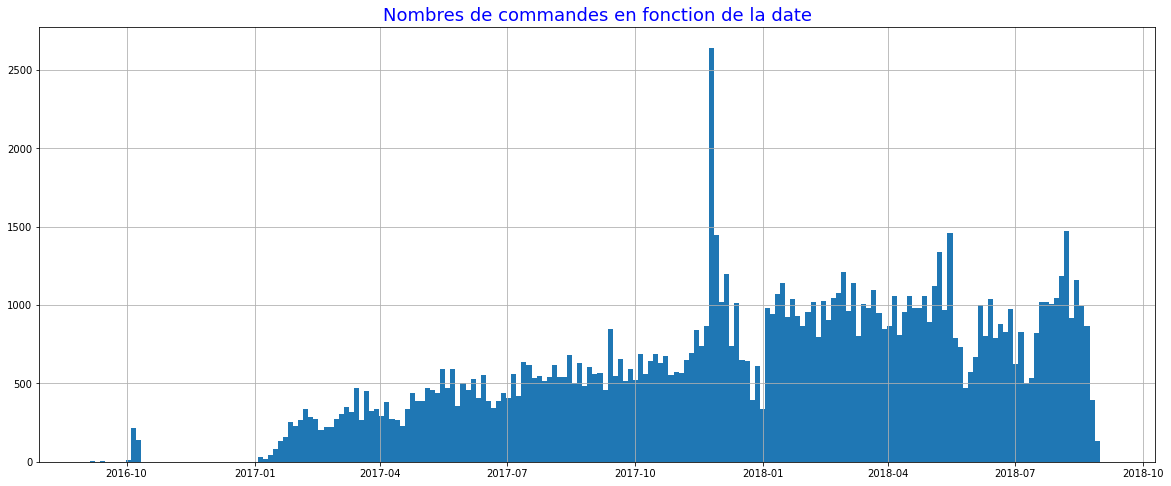

In [17]:
fig = plt.figure(figsize=(20, 8))
subset = pd.to_datetime(data_order['order_purchase_timestamp'])
subset.hist(bins=200)  # Crée l'histogramme
plt.title("Nombres de commandes en fonction de la date",
          fontsize=18,
          color="b")
plt.show()  # Affiche l'histogramme

In [37]:
# Je crée une variable, temps de livraison, qui est le temps entre la commande et la livraison

data['Temps_Livraison'] = (data['order_delivered_customer_date'] -
                           data['order_purchase_timestamp']).astype("timedelta64[D]")

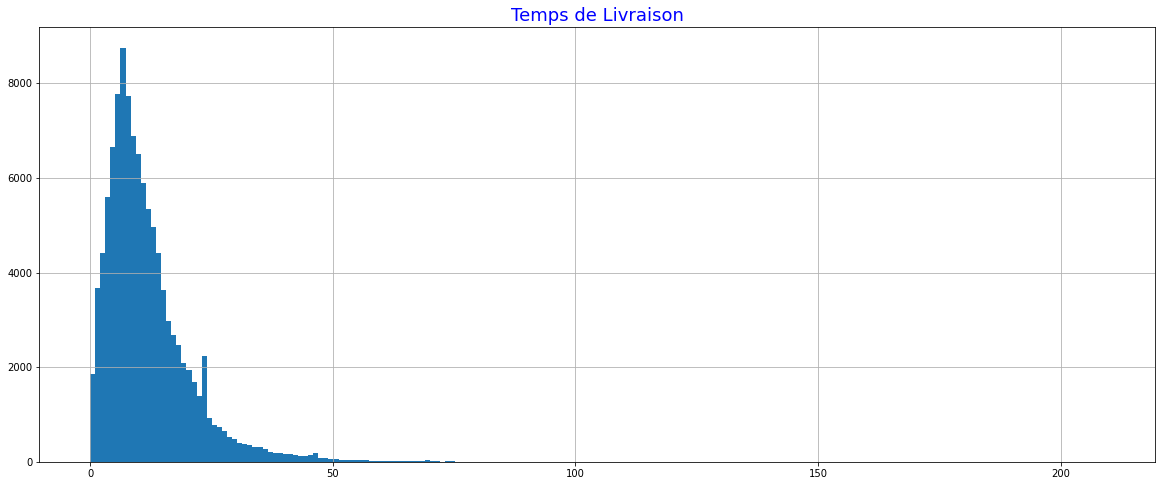

In [38]:
fig = plt.figure(figsize=(20, 8))
subset = data['Temps_Livraison']
subset.hist(bins=200)  # Crée l'histogramme
plt.title("Temps de Livraison",
          fontsize=18,
          color="b")
plt.show()  # Affiche l'histogramme

In [39]:
# Nous allons maintenant regarder le nombre de commande par client.

Nombre_commande_client = data.groupby("customer_id").agg({"order_id": "count"})

<Figure size 1440x576 with 0 Axes>

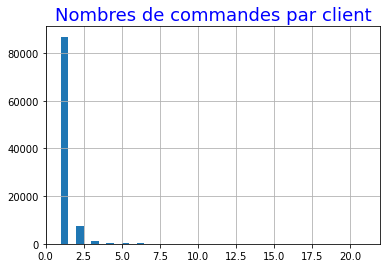

In [40]:
fig = plt.figure(figsize=(20, 8))
subset = Nombre_commande_client
subset.hist(bins=40) # Crée l'histogramme
plt.title("Nombres de commandes par client",
          fontsize=18,
          color="b")
plt.show() # Affiche l'histogramme

In [41]:
# Je vais maintenant regarder les dépenses moyennes de chaque client. Même si la plupart n'ont effecté qu'une seule commande,
# cela peut être intéressant pour les autres.

depense_client = data.groupby("customer_unique_id").agg({"price": 'mean'})

In [42]:
depense_client = depense_client.rename(columns={"price": "prix_moyen"})

In [43]:
# Je calcul la moyenne pour les descriptions de produits également 

description_produit = data.groupby("customer_unique_id").agg(
    {"product_description_lenght": 'mean', 'product_photos_qty': 'mean'})

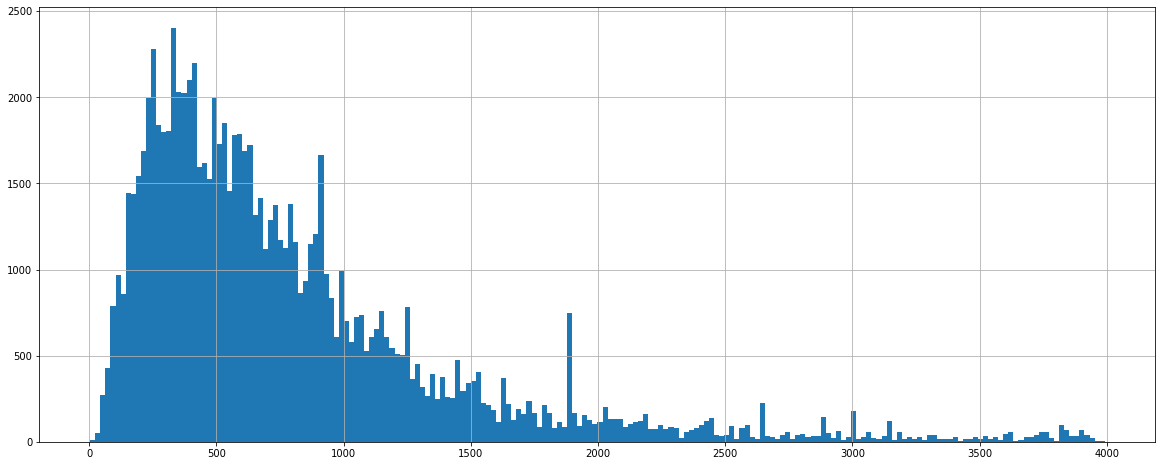

In [44]:
fig = plt.figure(figsize=(20, 8))
subset = description_produit['product_description_lenght']
subset.hist(bins=200)  # Crée l'histogramme
plt.show()  # Affiche l'histogramme

In [46]:
# Je calcul le total des moyens de payements et du nombre de versements 

payment = data.groupby("order_id")\
    .agg({"payment_sequential": "count",
          "payment_installments": "sum"
          })

In [47]:
payment = payment.rename(columns={
    "payment_sequential": "total_payment_sequential",
    "payment_installments": "sum_payment_installments"})

In [48]:
data = pd.merge(data,payment,how="left",on="order_id")

In [49]:
# Création du dataset client 

data_client = data.groupby("customer_unique_id")\
    .agg({"order_id": "nunique",
          "price": "sum",
          "freight_value": "sum",
          "total_payment_sequential": 'mean',
          "sum_payment_installments": 'mean',
          "review_score": "mean",
          "Temps_Livraison": "mean",
          "Distance": "mean"})

In [50]:
data_client = data_client.rename(columns={
    "price": "sum_price",
    "freight_value": "sum_freight_value"})

In [51]:
data_client = pd.merge(data_client,description_produit,how="left",on="customer_unique_id")

In [52]:
data_client = pd.merge(data_client,depense_client,how="left",on="customer_unique_id")

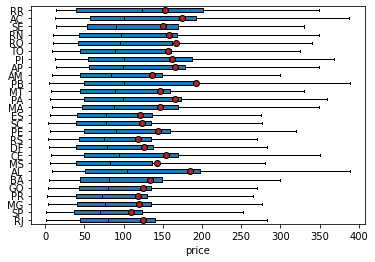

In [53]:
# Dans un premier temps, je vais regarder si l'état à une influence sur les dépenses des clients

X = "customer_state" # qualitative
Y = "price" # quantitative


modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.xlabel("price")

plt.show()

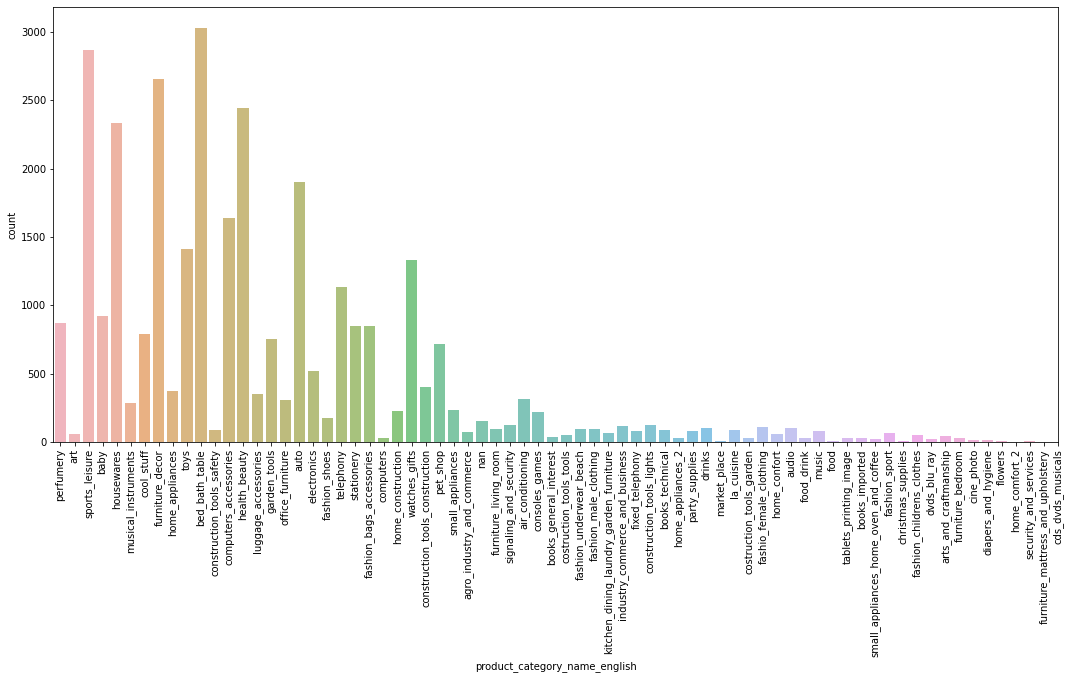

In [55]:
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=data_product, x="product_category_name_english", alpha=0.7)
plt.xticks(range(0, data_product["product_category_name_english"].nunique(
)+1), data_product["product_category_name_english"].unique(), rotation=90)
plt.show()

In [56]:
data["product_category_name_english"] = data["product_category_name_english"].fillna('Autres')

In [57]:
CATEGORIES = {
    'bed_bath_table': 'Maison',
    'health_beauty': 'Beauté',
    'sports_leisure': 'Sport',
    'furniture_decor': 'Maison',
    'computers_accessories': 'Technologies',
    'housewares': 'Maison',
    'watches_gifts': 'Vetement_accesoire',
    'telephony': 'Technologies',
    'garden_tools': 'Maison',
    'auto': 'Transport',
    'toys': 'Enfant',
    'cool_stuff': 'Autres',
    'perfumery': 'Beauté',
    'baby': 'Enfant',
    'electronics': 'Technologies',
    'stationery': 'Bureau',
    'fashion_bags_accessories': 'Vetement_accesoire',
    'pet_shop': 'Autres',
    'office_furniture': 'Bureau',
    'consoles_games': 'Technologies',
    'luggage_accessories': 'Vetement_accesoire',
    'construction_tools_construction': 'Maison',
    'home_appliances': 'Maison',
    'small_appliances': 'Maison',
    'musical_instruments': 'Arts',
    'home_construction': 'Maison',
    'books_general_interest': 'Arts',
    'food': 'Nourriture',
    'furniture_living_room': 'Maison',
    'home_confort': 'Maison',
    'audio': 'Technologies',
    'drinks': 'Nourriture',
    'market_place': 'Autres',
    'construction_tools_lights': 'Maison',
    'air_conditioning': 'Maison',
    'kitchen_dining_laundry_garden_furniture': 'Maison',
    'food_drink': 'Nourriture',
    'industry_commerce_and_business': 'Autres',
    'books_technical': 'Autres',
    'fashion_shoes': 'Vetement_accesoire',
    'fixed_telephony': 'Technologies',
    'costruction_tools_garden': 'Maison',
    'home_appliances_2': 'Maison',
    'agro_industry_and_commerce': 'Autres',
    'computers': 'Technologies',
    'signaling_and_security': 'Technologies',
    'art': 'Arts',
    'construction_tools_safety': 'Maison',
    'christmas_supplies': 'Enfant',
    'fashion_underwear_beach': 'Vetement_accesoire',
    'fashion_male_clothing': 'Vetement_accesoire',
    'furniture_bedroom': 'Maison',
    'costruction_tools_tools': 'Maison',
    'tablets_printing_image': 'Technologies',
    'small_appliances_home_oven_and_coffee': 'Maison',
    'cine_photo': 'Technologies',
    'dvds_blu_ray': 'Arts',
    'books_imported': 'Arts',
    'fashio_female_clothing': 'Vetement_accesoire',
    'party_supplies': 'Enfant',
    'music': 'Arts',
    'diapers_and_hygiene': 'Beauté',
    'furniture_mattress_and_upholstery': 'Maison',
    'flowers': 'Autres',
    'home_comfort_2': 'Maison',
    'fashion_sport': 'Sport',
    'arts_and_craftmanship': 'Arts',
    'cds_dvds_musicals': 'Arts',
    'la_cuisine': 'Maison',
    'fashion_childrens_clothes': 'Vetement_accesoire',
    'security_and_services': 'Autres',
}

In [58]:
# Correction des noms de pays et catégories

def detect_words(values, dictionary):
    result = []
    for lib in values:
        operation_type = "Autres"
        for word, val in dictionary.items():
            if word in lib:
                operation_type = val
        result.append(operation_type)
    return result


data["product_category_name_english"] = detect_words(
    data["product_category_name_english"], CATEGORIES)

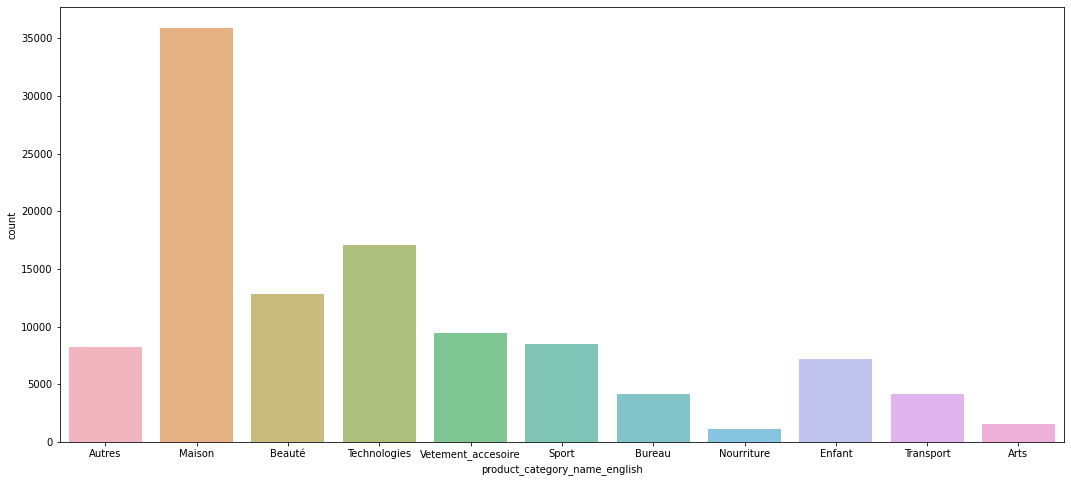

In [62]:
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=data, x="product_category_name_english", alpha=0.7)
plt.show()

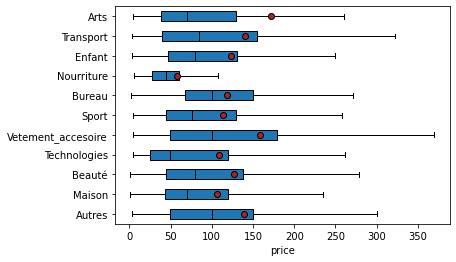

In [61]:
X = "product_category_name_english"  # qualitative
Y = "price"  # quantitative


modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X] == m][Y])

# Propriétés graphiques (pas très importantes)
medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.xlabel("price")

plt.show()

In [63]:
# Je vais transformer les variables catégories en variables quantitatives et calculer le nombre total de produit.

categories_customers = data.groupby(["customer_unique_id", "product_category_name_english"])\
    .agg({"order_item_id": "count"}).unstack()
categories_customers.columns = categories_customers.columns.droplevel(0)
categories_customers.fillna(0, inplace=True)
categories_customers["total_items"] = categories_customers.sum(axis=1)

In [65]:
# Je crée de nouvelles variables.

data_client["sum_freight_ratio"] = data_client["sum_freight_value"] / \
    (data_client["sum_price"] + data_client["sum_freight_value"])
data_client["mean_price_order"] = data_client["sum_price"] / \
    data_client["order_id"]
data_client["total_spend"] = (
    data_client["sum_price"] + data_client["sum_freight_value"])

In [66]:
# Je crée un deuxième dataset avec les catégories de clients pour pouvoir tester les algorithmes de clustering sur les deux
# de façon indépendantes.

data_client_categ = pd.merge(
    data_client, categories_customers, how="left", on="customer_unique_id")

In [70]:
description_produit

,product_description_lenght,product_photos_qty
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,236.0,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,635.0,1.0
0000f46a3911fa3c0805444483337064,177.0,3.0
0000f6ccb0745a6a4b88665a16c9f078,1741.0,5.0
0004aac84e0df4da2b147fca70cf8255,794.0,3.0
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,478.5,1.0
fffea47cd6d3cc0a88bd621562a9d061,506.0,2.0
ffff371b4d645b6ecea244b27531430a,716.0,5.0


In [73]:
# Enregistrement au format CSV

data.to_csv("data.csv", index=True)
description_produit.to_csv("description_produit.csv", index=True)
depense_client.to_csv("depense_client.csv", index=True)
data_client.to_csv("data_client.csv", index=True)
data_client_categ.to_csv("data_client_categ.csv", index=True)